---
# __Google Play Store Dataset__ 
### _Complete EDA anaylsis for `Begineers to Advance level`_

## _About the Dataset_

### `Description`
The dataset is downloded  from the kaggle.com form the follwoing [link]: https://www.kaggle.com/datasets/lava18/google-play-store-apps
- `Context`\
While many public datasets (on Kaggle and the like) provide Apple App Store data, there are not many counterpart datasets available for Google Play Store apps anywhere on the web. On digging deeper, I found out that iTunes App Store page deploys a nicely indexed appendix-like structure to allow for simple and easy web scraping. On the other hand, Google Play Store uses sophisticated modern-day techniques (like dynamic page load) using JQuery making scraping more challenging.
- `Content`\
Each app (row) has values for catergory, rating, size, and more.
- `Acknowledgements`\
This information is scraped from the Google Play Store. This app information would not be available without it.
- `Inspiration`\
The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market!
---

# __1. First we install thel necessary libraries__

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# to show the plot in the jupter notebook and not in the external window 
%matplotlib inline   

========================================================================================================================================================

# __2. Data loading and than Cleaning the dataset__

- ### Lets load the csv file

In [3]:
df = pd.read_csv('googleplaystore.csv')

- ### Now lets have a look on the first few rows of the df data

In [4]:
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


---
- ## Important thing to know 
1. to show the maximum rows and columns when they are called.
2. to avoid the unusual warning while running the chunk
---

In [5]:
# set options maximum for the rows and colomns in the output dataframe in the df to show the complete data
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [6]:
# for the unusual warnings 
import warnings
warnings.filterwarnings('ignore')

In [7]:
# now we see the names of the colomns in the df dataset
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [8]:
# now we see the shape of the df data
df.shape

(10841, 13)

In [9]:
print("The total number of colomns in the dataset are as follows:"
      ,df.columns)

The total number of colomns in the dataset are as follows: Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')


In [10]:
print("The shape of the data is",df.shape)  # shape shows the no. of rows and colomns in the dataset.

The shape of the data is (10841, 13)


In [11]:
# now we see the information realted to the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10839 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


In [208]:
df.isnull().sum()

App                  0
Category             1
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               1
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

### _Observations_
---
1. There are 10841 rows and 13 columns in the dataset.
2. The columns are of different data types.
3. The columns in the dataseta are \
    `'App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type','Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver','Android Ver'`
4. There are some missing values in the columns of the dataset that are to deal with it in the later session.
5. There are three columns in the dataset that are to be numeric but are not but we must deal with it later in notebook.\
    `'size' , 'Installs' , 'Price'`
---

In [112]:
# to see the numeric columns in the data we use the describe function
df.describe()

,Rating,Reviews
count,9367.000000,1.084100e+04
mean,4.191513,4.441119e+05
std,0.515735,2.927629e+06
min,1.000000,0.000000e+00
25%,4.000000,3.800000e+01
50%,4.300000,2.094000e+03
75%,4.500000,5.476800e+04
max,5.000000,7.815831e+07


### _Observations_
---
- we see that there are only two of the numeric columns in the data but we have three more that have a type of the object that we can deal with it later and convert into the numeric that are:\
     `'size' , 'Installs' , 'Price'`
---

- # How to make a size colomn a numeric column

In [113]:
df['Size'].isnull().sum()

0

In [114]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [115]:
df['Size'].value_counts()

Size
Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
15M                    184
17M                    160
19M                    154
26M                    149
16M                    149
25M                    143
20M                    139
21M                    138
10M                    136
24M                    136
18M                    133
23M                    117
22M                    114
29M                    103
27M                     97
28M                     95
30M                     84
33M                     79
3.3M                    77
37M                     76
35M                     72
31M                     70
2.9M                    69
2.3M                    68
2.5M                    68
2.8M                    65
3.4M                    65
32M                     63
34M                     63
3.7M                    63
3.9M                    62
3.8M                   

In [116]:
# before this we check the null observaiton in the dataset and there we see the null observation in the size column
df.isnull().sum()

App                  0
Category             1
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               1
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

---
## Three types of the observaion in the size colomn 
1. varies with device
2. M
3. K
---

- no missing observation in the size column, so we are good to go 

- verify the number of values of three different kinds for values in the size column in df.

In [12]:
# find the values having M in them
df['Size'].loc[df['Size'].str.contains('M')].value_counts()

Size
11M      198
12M      196
14M      194
13M      191
15M      184
17M      160
19M      154
16M      149
26M      149
25M      143
20M      139
21M      138
24M      136
10M      136
18M      133
23M      117
22M      114
29M      103
27M       97
28M       95
30M       84
33M       79
3.3M      77
37M       76
35M       72
31M       70
2.9M      69
2.5M      68
2.3M      68
2.8M      65
3.4M      65
3.7M      63
34M       63
32M       63
3.9M      62
40M       62
3.0M      62
3.8M      62
4.0M      61
44M       61
36M       60
48M       59
46M       59
4.2M      59
5.0M      58
3.6M      57
39M       56
3.1M      56
3.2M      55
38M       55
4.3M      54
2.7M      53
4.1M      52
5.4M      51
2.0M      51
3.5M      51
4.9M      50
2.6M      50
1.8M      50
1.5M      48
2.4M      48
5.7M      48
41M       48
43M       47
4.6M      46
6.3M      45
2.2M      45
49M       45
5.3M      44
50M       44
53M       43
5.1M      43
4.4M      42
1.2M      41
63M       41
42M       41
1.7M   

In [13]:
df['Size'].loc[df['Size'].str.contains('M')].value_counts().sum()

np.int64(8830)

In [14]:
# find the values having k in them
df['Size'].loc[df['Size'].str.contains('k')].value_counts().sum()

np.int64(316)

In [15]:
# find the values having M in them
df['Size'].loc[df['Size'].str.contains('Varies with device')].value_counts().sum()

np.int64(1695)

---
Now we see in the size column that we have:
-  8830 M values. 
-  316  K values.
-  1695 varies with device values.

Now we create a function that convert the size column that has values in M , K in bytes and varies with device in nan.

---

In [16]:
# Define a function to convert size values to bytes
def convert_size_to_bytes(size):
    if isinstance(size, str):
        if size.endswith('M'):
            return float(size[:-1]) * 1024 * 1024
        elif size.endswith('k'):
            return float(size[:-1]) * 1024
        elif size.lower() == 'varies with device':
            return np.nan
    return size

df['Size'] = df['Size'].apply(convert_size_to_bytes)
df['Size'].head(10)

0    19922944.0
1    14680064.0
2     9122611.2
3    26214400.0
4     2936012.8
5     5872025.6
6    19922944.0
7    30408704.0
8    34603008.0
9     3250585.6
Name: Size, dtype: float64

---
- now we have convert the whole of the values in the size column that have `M and k` in it into bytes and `varies with device` value into `nan` as it is a string value , now we convet it all the values into integer value.
---

In [19]:
# now the size column is in bytes so 
df.rename(columns={'Size':'Size_in_bytes'},inplace=True)

In [20]:
df.head(5)

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [21]:
# now i have to convert the column of size_in_bytes to size_in_Mbs in the df dataset
df['Size_in_Mbs'] = df['Size_in_bytes'] / (1024 * 1024)
df.head()

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mbs
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.8


In [22]:
df['Size_in_bytes'].dtypes

dtype('float64')

In [23]:
df['Size_in_Mbs'].dtypes

dtype('float64')

- ## Lets take care of installs in the df data

In [127]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [24]:
df['Installs'].value_counts()

Installs
1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             908
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Name: count, dtype: int64

In [129]:
# find the values that has + in them
df['Installs'].loc[df['Installs'].str.contains('\+')].value_counts().sum()

10840

- this \ before the + sign in it indecate that there must be some thing before the + sign in the  obervation.

In [25]:
# now we  check taht is there any missing value in the install column
df['Installs'].isnull().sum()

np.int64(0)

# install columns
1. remove + sign
2. remove
3. convert the column into integer

In [26]:
df['Installs']=df['Installs'].apply(lambda x: x.replace('+','') if '+' in str(x) else x)
df['Installs']=df['Installs'].apply(lambda x: x.replace(',','')if ',' in str(x) else x)
df['Installs']=df['Installs'].apply(lambda x: int(x))

In [27]:
df['Installs'].value_counts()  

Installs
1000000       1579
10000000      1252
100000        1169
10000         1054
1000           908
5000000        752
100            719
500000         539
50000          479
5000           477
100000000      409
10             386
500            330
50000000       289
50             205
5               82
500000000       72
1               67
1000000000      58
0               15
Name: count, dtype: int64

In [28]:
# now convet all the values in the installs columns into integer
df['Installs']=df['Installs'].apply(lambda x: int(x))

In [29]:
df['Installs'].value_counts()

Installs
1000000       1579
10000000      1252
100000        1169
10000         1054
1000           908
5000000        752
100            719
500000         539
50000          479
5000           477
100000000      409
10             386
500            330
50000000       289
50             205
5               82
500000000       72
1               67
1000000000      58
0               15
Name: count, dtype: int64

---
- now we see the `data type` of the installs and `max and min` installations of the app in the playstroedataset.
---

In [30]:
df['Installs'].dtypes

dtype('int64')

In [31]:
df['Installs'].max()

np.int64(1000000000)

In [32]:
df['Installs'].min()

np.int64(0)

In [33]:
# we can also create the new column of the install category in the df dataset for over better analysis by creating the bins of 
# the install column
bins=[0,10,100,1000,10000,100000,1000000,10000000,1000000000]
labels=['no','very_low','low','medium','high','very_high','very_very_high','very_very_very_high']
df['Installs_category']=pd.cut(df['Installs'],bins=bins,labels=labels)

In [34]:
df['Installs_category'].value_counts()

Installs_category
very_high              2118
very_very_high         2004
high                   1648
medium                 1531
low                    1238
very_low                924
very_very_very_high     828
no                      535
Name: count, dtype: int64

In [35]:
df.head(3)

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mbs,Installs_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0,medium
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0,very_high
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7,very_very_high


- # Price columns in the df data

In [36]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [37]:
df['Price'].value_counts()

Price
0          10041
$0.99        148
$2.99        129
$1.99         73
$4.99         72
$3.99         63
$1.49         46
$5.99         30
$2.49         26
$9.99         21
$6.99         13
$399.99       12
$14.99        11
$4.49          9
$29.99         7
$3.49          7
$7.99          7
$24.99         7
$5.49          6
$19.99         6
$6.49          5
$8.99          5
$12.99         5
$11.99         5
$10.00         3
$1.00          3
$16.99         3
$2.00          3
$17.99         2
$10.99         2
$9.00          2
$79.99         2
$7.49          2
$3.95          2
$33.99         2
$1.70          2
$13.99         2
$8.49          2
$39.99         2
$1.50          1
$25.99         1
$74.99         1
$15.99         1
$3.88          1
$1.76          1
$3.02          1
$400.00        1
$4.84          1
$2.50          1
$1.59          1
$1.61          1
$4.77          1
$5.00          1
$1.29          1
$379.99        1
$299.99        1
$37.99         1
$18.99         1
$389.99 

In [41]:
# first of all we see how may of the values have the doller sign with it in the price column
df['Price'].loc[df['Price'].str.contains('\$')].value_counts().sum()


np.int64(800)

In [39]:
# now we count the values in the price column that has 0 value in it but not contain the dollor sign in it
df['Price'].loc[df['Price']==0].value_counts().sum()

np.int64(0)

---
- now after that we are confirmed that the only currency used is the dollor and the we have total` 800 cells with the dollor in it and the rest are 0`.\
        `= 800 + 10041`\
        `= 10841 in total`.
- the only problem is the dollor sing , we simply remvoe it and than make the column numeric.
---

In [42]:
# the only problem is the dollor sign we remove it and make the column numeric
df['Price']=df['Price'].str.replace('$','')
df['Price']=df['Price'].apply(lambda x: 0 if x==0 else float(x))

In [43]:
df['Price'].value_counts()

Price
0.00      10041
0.99        148
2.99        129
1.99         73
4.99         72
3.99         63
1.49         46
5.99         30
2.49         26
9.99         21
6.99         13
399.99       12
14.99        11
4.49          9
29.99         7
3.49          7
7.99          7
24.99         7
5.49          6
19.99         6
6.49          5
8.99          5
12.99         5
11.99         5
10.00         3
1.00          3
16.99         3
2.00          3
17.99         2
10.99         2
9.00          2
79.99         2
7.49          2
3.95          2
33.99         2
1.70          2
13.99         2
8.49          2
39.99         2
1.50          1
25.99         1
74.99         1
15.99         1
3.88          1
1.76          1
3.02          1
400.00        1
4.84          1
2.50          1
1.59          1
1.61          1
4.77          1
5.00          1
1.29          1
379.99        1
299.99        1
37.99         1
18.99         1
389.99        1
19.90         1
1.75          1
14.00         1
4.

- After we have remove the dollor sign we ,convert the price column into the numeric column.

In [44]:
df['Price'].dtypes

dtype('float64')

## __2.1 Descriptive Statistics of the dataset df.__

In [45]:
df.describe()

,Rating,Reviews,Size_in_bytes,Installs,Price,Size_in_Mbs
count,9367.000000,1.084100e+04,9.146000e+03,1.084100e+04,10841.000000,9146.000000
mean,4.191513,4.441119e+05,2.255921e+07,1.546291e+07,1.027273,21.514141
std,0.515735,2.927629e+06,2.368595e+07,8.502557e+07,15.948971,22.588679
min,1.000000,0.000000e+00,8.704000e+03,0.000000e+00,0.000000,0.008301
25%,4.000000,3.800000e+01,5.138022e+06,1.000000e+03,0.000000,4.900000
50%,4.300000,2.094000e+03,1.363149e+07,1.000000e+05,0.000000,13.000000
75%,4.500000,5.476800e+04,3.145728e+07,5.000000e+06,0.000000,30.000000
max,5.000000,7.815831e+07,1.048576e+08,1.000000e+09,400.000000,100.000000


In [46]:
# now using the f function give me the min max and average price of the app
print(f"Min of Price is {df['Price'].min()} $")
print(f"Max of Price is {df['Price'].max()} $")
print(f"Mean of Price is {df['Price'].mean()} $")

Min of Price is 0.0 $
Max of Price is 400.0 $
Mean of Price is 1.0272733142699015 $


## _Observations_
---
- now we have only six column in the dataset as numeric data type.
- we can observe this descriptive statistics, and we can make tones of hypothesis form it.
- if we see the rating column , we see that `the min rating is 1 and max rating is 5` and on average the rating is `4.191513` which is good rating and people  give this rating on average.
- when we see the reviews we see that `min reviews  are 0 and max reviews are 7.815831e+07` and on avearge the the usere reviews on the app is `4.441119e+05` which is a good number.
- similarly we can do the same on the above.
  
The most important thing is to classify the app based on the correlation matrix than we observed the descriptive statistics of the app categroy and number of installs , reviews , ratng etc.

---
## But even before that we have to think of the missing values in the dataset df.

## __2.2 Dealing with the missing values in the data__

---
- dealing with missing values of the data is one of the most important part of the data wranigling processes we must deal with the missing values in order to get the correct insinght of the data.
---

In [47]:
# missing values inside the df dataset
missing_values = df.isnull().sum()
print("Missing values in each of the columns are given below as:")
print(missing_values)

Missing values in each of the columns are given below as:
App                     0
Category                1
Rating               1474
Reviews                 0
Size_in_bytes        1695
Installs                0
Type                    1
Price                   0
Content Rating          0
Genres                  1
Last Updated            0
Current Ver             8
Android Ver             2
Size_in_Mbs          1695
Installs_category      15
dtype: int64


In [151]:
# now find the percentage of the missing values in the df dataset
missing_percentage = ((missing_values / len(df)) * 100).sort_values(ascending=False)
print("Percentage of missing values in the dataset:")
print(missing_percentage)

Percentage of missing values in the dataset:
Size_in_bytes        15.635089
Size_in_Mbs          15.635089
Rating               13.596532
Installs_category     0.138364
Current Ver           0.073794
Android Ver           0.018448
Category              0.009224
Type                  0.009224
Genres                0.009224
App                   0.000000
Reviews               0.000000
Installs              0.000000
Price                 0.000000
Content Rating        0.000000
Last Updated          0.000000
dtype: float64


In [48]:
# find the total number of the missing values in the df dataset
total_missing_values = df.isnull().sum().sum()
print("Total number of missing values in the dataset:")
print(total_missing_values)

Total number of missing values in the dataset:
4892


---
- lets plot the missing values in the dataset.
---

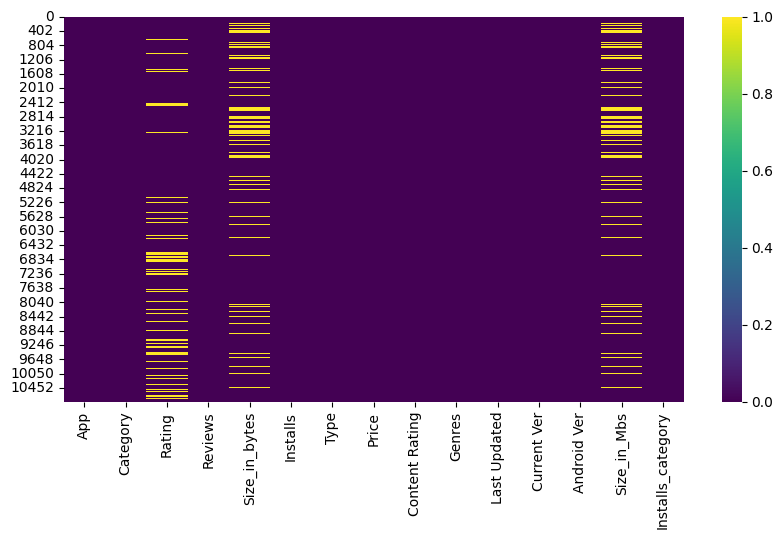

In [49]:
# now plot the missing values of the df dataset
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cmap='viridis')
plt.show()

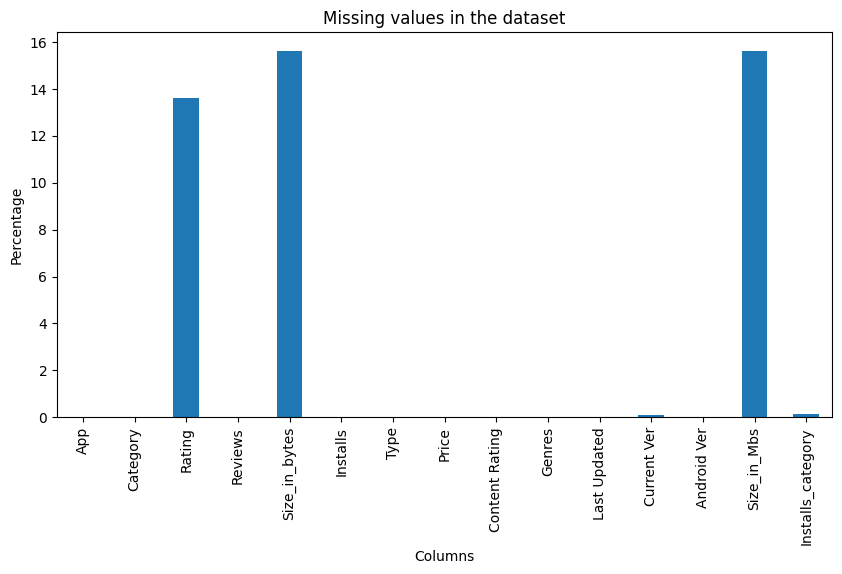

In [50]:
# now we make the bar plot of the missing values in the dataset df
plt.figure(figsize=(10,5))
# plot the missing values percentage
missing_percentage=df.isnull().sum()/len(df)*100
missing_percentage.plot(kind='bar')
# add the labels
plt.xlabel('Columns')
plt.ylabel('Percentage')
plt.title('Missing values in the dataset')
plt.show()

- lets plot the missing values other than rating , `size_in_bytes and size_in_mb columns`.

In [51]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size_in_bytes', 'Installs',
       'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver', 'Size_in_Mbs', 'Installs_category'],
      dtype='object')

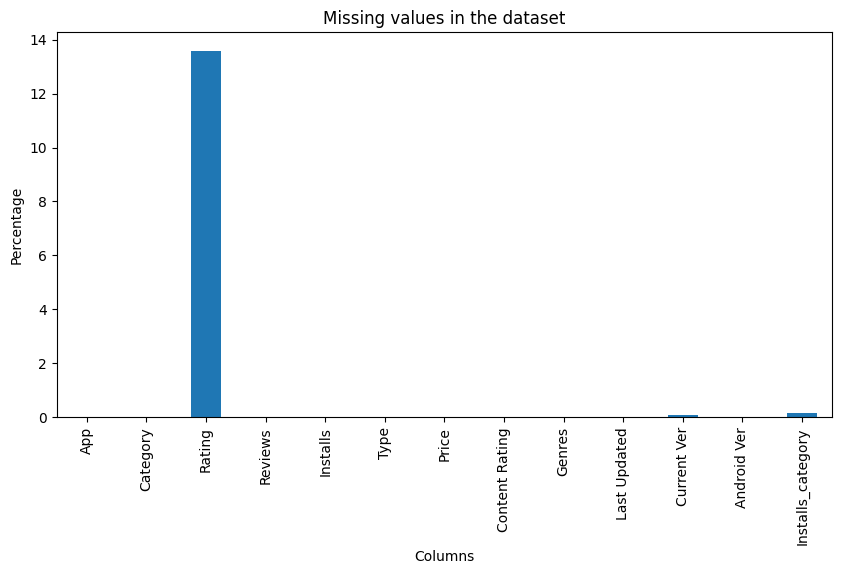

In [52]:
# now we maket the bar plot of the missing values in the dataset df but excluding the size_in_bytes and size_in_mbs.
plt.figure(figsize=(10,5))
# plot the missing values percentage
missing_percentage=df.isnull().sum()/len(df)*100
missing_percentage.drop(['Size_in_bytes','Size_in_Mbs']).plot(kind='bar')
# add the labels
plt.xlabel('Columns')
plt.ylabel('Percentage')
plt.title('Missing values in the dataset')
plt.show()

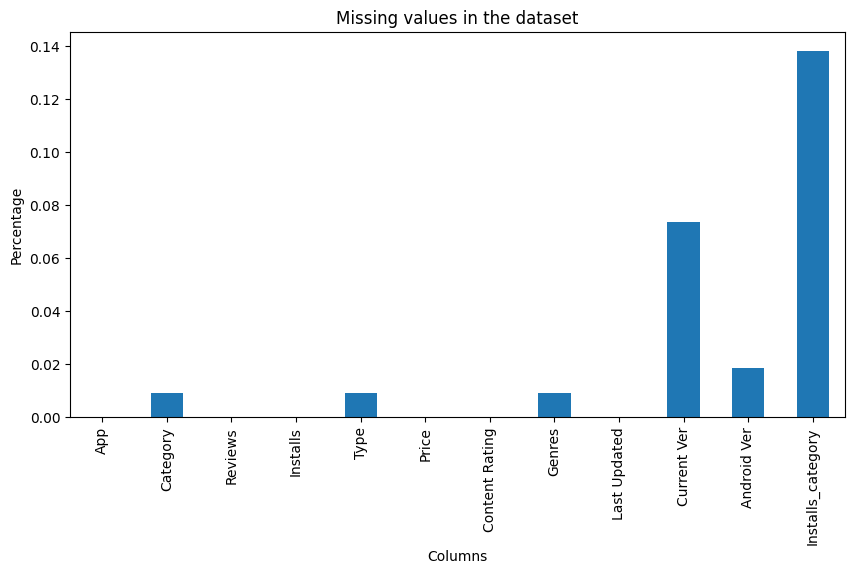

In [157]:
# now we plot the column that have missing values less than 1 percent
plt.figure(figsize=(10,5))
missing_percentage[missing_percentage<1].plot(kind='bar')
plt.xlabel('Columns')
plt.ylabel('Percentage')
plt.title('Missing values in the dataset')
plt.show()

In [53]:
# the missing values interm of percentage is
missing_percentage.sort_values(ascending=False)

Size_in_bytes        15.635089
Size_in_Mbs          15.635089
Rating               13.596532
Installs_category     0.138364
Current Ver           0.073794
Android Ver           0.018448
Category              0.009224
Genres                0.009224
Type                  0.009224
App                   0.000000
Reviews               0.000000
Installs              0.000000
Last Updated          0.000000
Price                 0.000000
Content Rating        0.000000
dtype: float64

## _Observation_
---
- we have `1695 missing values` in the `size_in_bytes and size_in_Mbs` column which is `15.6%` of the total values in the columns.
- we have `1474 missing vaues` in the `ration column` which is teh `13.6%` of the total values in the column.
- we have `8 missing vaues` in the `current version` column which is the `0.07%` of the total values in the column.
- we have `2 missing vaues` in the `category,type and generous column` which is teh `0.009%` of the total values in the column.

---

## __2.3 Dealing with the missing values__
---
- we can now impute the rating column as is directly linked withe the installation column. to test the hypothesis we need to plot the rationg colun with the installs and size columns  and stationary test it using pearson correlation test.
---

In [159]:
df.describe()

,Rating,Reviews,Size_in_bytes,Installs,Price,Size_in_Mbs
count,9367.000000,1.084100e+04,9.146000e+03,1.084100e+04,10841.000000,9146.000000
mean,4.191513,4.441119e+05,2.255921e+07,1.546291e+07,1.027273,21.514141
std,0.515735,2.927629e+06,2.368595e+07,8.502557e+07,15.948971,22.588679
min,1.000000,0.000000e+00,8.704000e+03,0.000000e+00,0.000000,0.008301
25%,4.000000,3.800000e+01,5.138022e+06,1.000000e+03,0.000000,4.900000
50%,4.300000,2.094000e+03,1.363149e+07,1.000000e+05,0.000000,13.000000
75%,4.500000,5.476800e+04,3.145728e+07,5.000000e+06,0.000000,30.000000
max,5.000000,7.815831e+07,1.048576e+08,1.000000e+09,400.000000,100.000000


<Axes: >

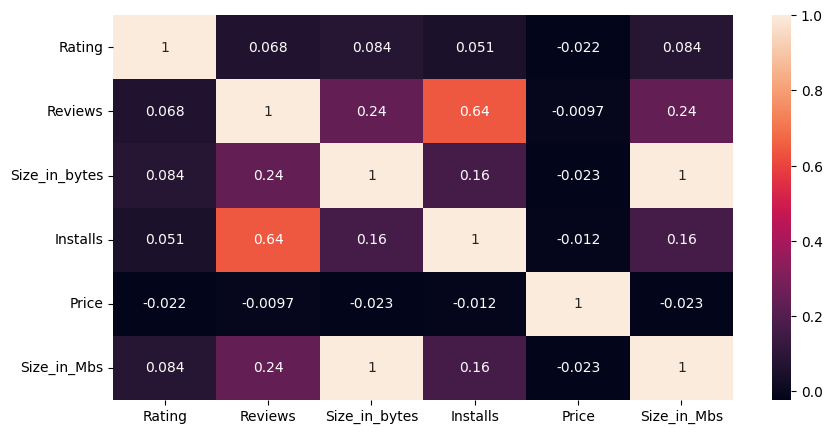

In [54]:
# now we make the correlation matrix of the columns that has a type numeric in the df dataset 
plt.figure(figsize=(10,5))
numeric_cols=['Rating','Reviews','Size_in_bytes','Installs','Price','Size_in_Mbs']
sns.heatmap(df[numeric_cols].corr(), annot=True)

In [55]:
df[numeric_cols].corr()

,Rating,Reviews,Size_in_bytes,Installs,Price,Size_in_Mbs
Rating,1.000000,0.068147,0.084098,0.051393,-0.021851,0.084098
Reviews,0.068147,1.000000,0.238218,0.643123,-0.009666,0.238218
Size_in_bytes,0.084098,0.238218,1.000000,0.164794,-0.023000,1.000000
Installs,0.051393,0.643123,0.164794,1.000000,-0.011688,0.164794
Price,-0.021851,-0.009666,-0.023000,-0.011688,1.000000,-0.023000
Size_in_Mbs,0.084098,0.238218,1.000000,0.164794,-0.023000,1.000000


In [ ]:
# now we calculate the pearson corrleation cofficient using scipy as  well 
# we install the sicpy library and than import it as 
from scipy import stats
# now we remove the rows that have the nan values in it 
df_clean=df.dropna()
# now we calculate the pearson corrleation cofficient
pearson_r,_=stats.pearsonr(df_clean['Rating'],df_clean['Reviews'])
print(f"pearson r between reviews and installs:{pearson_r:.4f}")

---
## Observation
- lighter color shows the high correlation and the darket color shows low correlation.
- we see that the reviews columns have the higher correlation with the installs columns which is 0.64, which is quite good.
    - this shows that the more the revies the more the installs of thel app.if in case we have to impute the revies we have to think of the installs.
        - if we have and app of 2 installs and we impute the reviews with the 1000 or via average reviews then it will be wrong.
- installs are slighthly correlated with the size_in_bytes , size_in_mbs, which is 0.16 this also shows us the importantce of the installs. but we cannot depend on it as its pearson coreelation is very small.
---
- before going a head lets remove the rows with missing in the current ver, android ver , category , type and geners columns, as they are very less in number an will no t affect our analysis.

In [57]:
# length befroe removing the null values in the dataset df
print(f"lengh of df before removing the null values:{len(df)}")

lengh of df before removing the null values:10841


In [58]:
df.dropna(subset=['Current Ver','Android Ver','Category','Type','Genres','Installs_category'],inplace=True)

In [59]:
print(f"lengh of df after removing the null values:{len(df)}")

lengh of df after removing the null values:10815


---
- 12 rows that contain null values in the df columns that are `'Current Ver','Android Ver','Category','Type','Genres'` has been removed for it .
---

In [60]:
# now lets check the null values again
df.isnull().sum().sort_values(ascending=False)

Size_in_bytes        1694
Size_in_Mbs          1694
Rating               1455
Category                0
Reviews                 0
Installs                0
App                     0
Type                    0
Price                   0
Genres                  0
Content Rating          0
Last Updated            0
Current Ver             0
Android Ver             0
Installs_category       0
dtype: int64

---
## Observations
- only rating , Size_in_bytes or Size_in_Mbs column are left with the missing values.
    - we know that we have to be very carefull while dealing with rating column ans it is linked with the installs columns.
    -  in size column we already know about varies with device values , which we convert it into the null values we do not need to impute at the momoet as every app has a different size and nobody can predict that as nearly possilble.
---

In [61]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size_in_bytes', 'Installs',
       'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver', 'Size_in_Mbs', 'Installs_category'],
      dtype='object')

In [62]:
# use groupby function to find the trend of ration in each installs_category
df.groupby('Installs_category')['Rating'].describe()

,count,mean,std,min,25%,50%,75%,max
Installs_category,,,,,,,,
no,81.0,4.637037,0.845199,1.0,4.8,5.0,5.0,5.0
very_low,365.0,4.372055,0.879740,1.0,4.1,4.7,5.0,5.0
low,913.0,4.090581,0.789222,1.0,3.8,4.3,4.7,5.0
medium,1440.0,4.035417,0.604428,1.4,3.8,4.2,4.5,5.0
high,1616.0,4.093255,0.505619,1.6,3.9,4.2,4.5,4.9
very_high,2113.0,4.207525,0.376594,1.8,4.0,4.3,4.5,4.9
very_very_high,2004.0,4.287076,0.294902,2.0,4.1,4.3,4.5,4.9
very_very_very_high,828.0,4.374396,0.193726,3.1,4.3,4.4,4.5,4.8


In [63]:
df['Rating'].isnull().sum()

np.int64(1455)

In [64]:
df['Installs_category'].loc[df['Rating'].isnull()].value_counts()

Installs_category
very_low               558
no                     453
low                    322
medium                  88
high                    31
very_high                3
very_very_high           0
very_very_very_high      0
Name: count, dtype: int64

Text(6, 3.5, 'Null values:0')

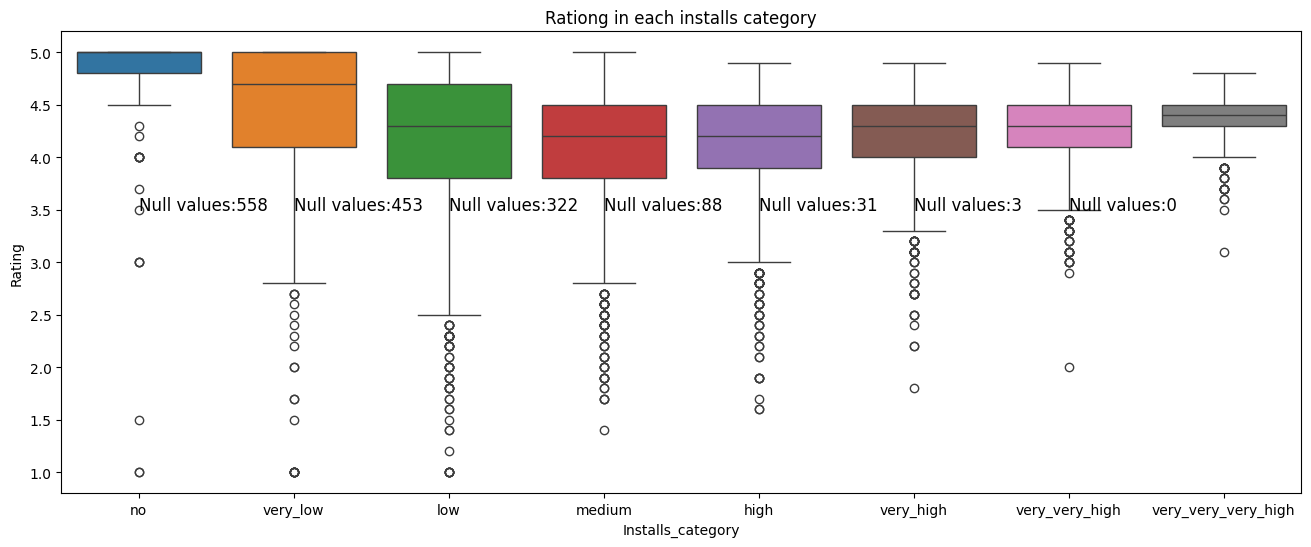

In [65]:
# now we create the boxplot of rationg in each installs category
plt.figure(figsize=(16,6))
sns.boxplot(x='Installs_category',y='Rating',hue='Installs_category',data=df)
# add the labels and also the number of the missing values of each install category lable on the boxplots.
plt.xlabel('Installs_category')
plt.ylabel('Rating')
plt.title('Rationg in each installs category')
plt.text(0,3.5,'Null values:558',fontsize=12)
plt.text(1,3.5,'Null values:453',fontsize=12)
plt.text(2,3.5,'Null values:322',fontsize=12)
plt.text(3,3.5,'Null values:88',fontsize=12)
plt.text(4,3.5,'Null values:31',fontsize=12)
plt.text(5,3.5,'Null values:3',fontsize=12)
plt.text(6,3.5,'Null values:0',fontsize=12)

In [66]:
# now we replace the missing values of rating ,with respect to the averages given in  each installs category
df['Rating'].fillna(df.groupby('Installs_category')['Rating'].transform('mean'),inplace=True)

In [67]:
df.isnull().sum().sort_values(ascending=False)

Size_in_bytes        1694
Size_in_Mbs          1694
Category                0
Rating                  0
Reviews                 0
Installs                0
App                     0
Type                    0
Price                   0
Genres                  0
Content Rating          0
Last Updated            0
Current Ver             0
Android Ver             0
Installs_category       0
dtype: int64

---
- we have repalce the missing values of rating column with the mean with respect to the installs categroy , as we have different category of the installs of the apps.
---
now we check furuthur dataset and than see the what it says.

<Axes: xlabel='Installs_category', ylabel='Reviews'>

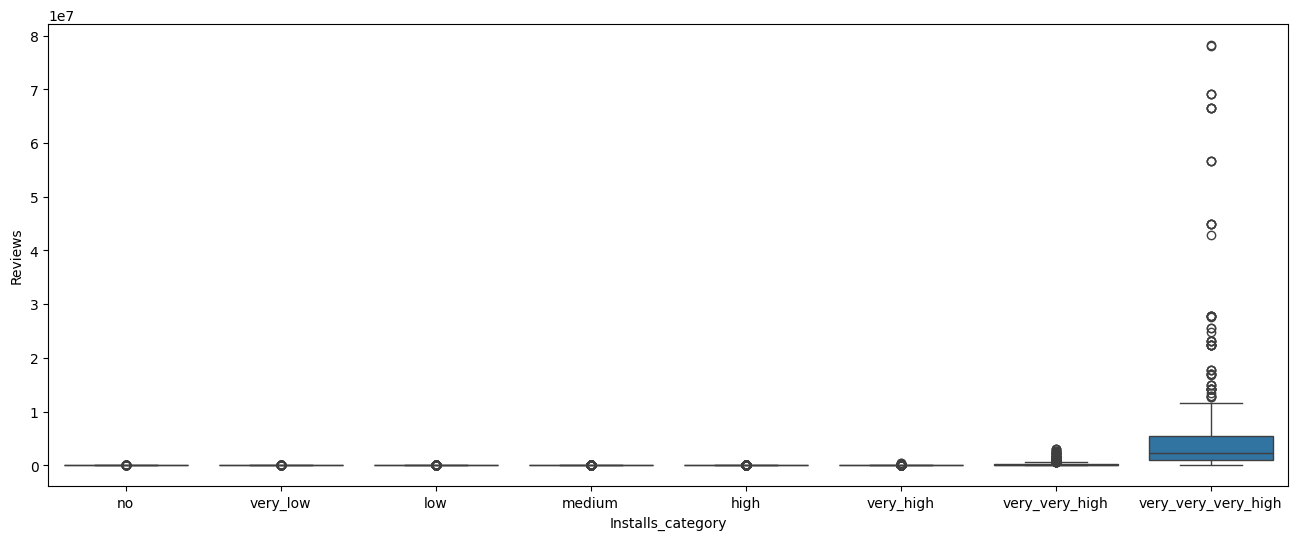

In [68]:
# lets plt the same plot for the reviees column as well
plt.figure(figsize=(16,6))
sns.boxplot(x='Installs_category',y='Reviews',data=df)

---
##### As we see the in the graph the graph is so messy and not give the effective results and it is difficult to deduce the result out of it, on the y axis we see the number of reveiws that are 80 million on max, so in order to make the thing in such a way to be easy understandable we apply the transformation on the data.
---

<Axes: xlabel='Installs_category', ylabel='Reviews'>

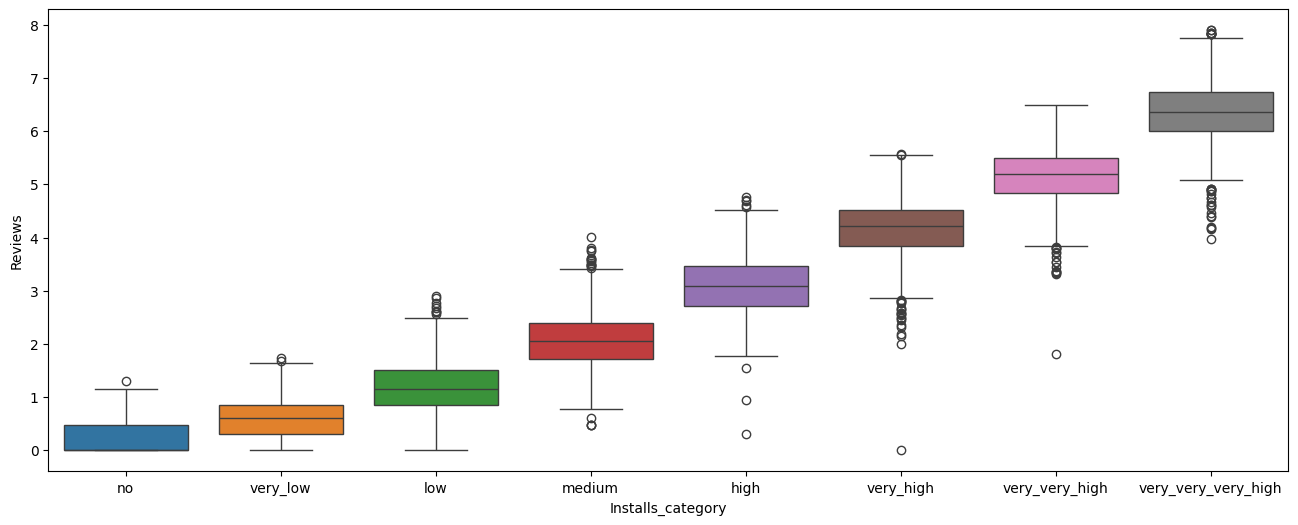

In [69]:
plt.figure(figsize=(16,6))
sns.boxplot(x='Installs_category',y=np.log10(df['Reviews']),hue='Installs_category',data=df)

---
- we also draw the scatter plot of the rating and review column with the installs column.
---

<Axes: xlabel='Rating', ylabel='Reviews'>

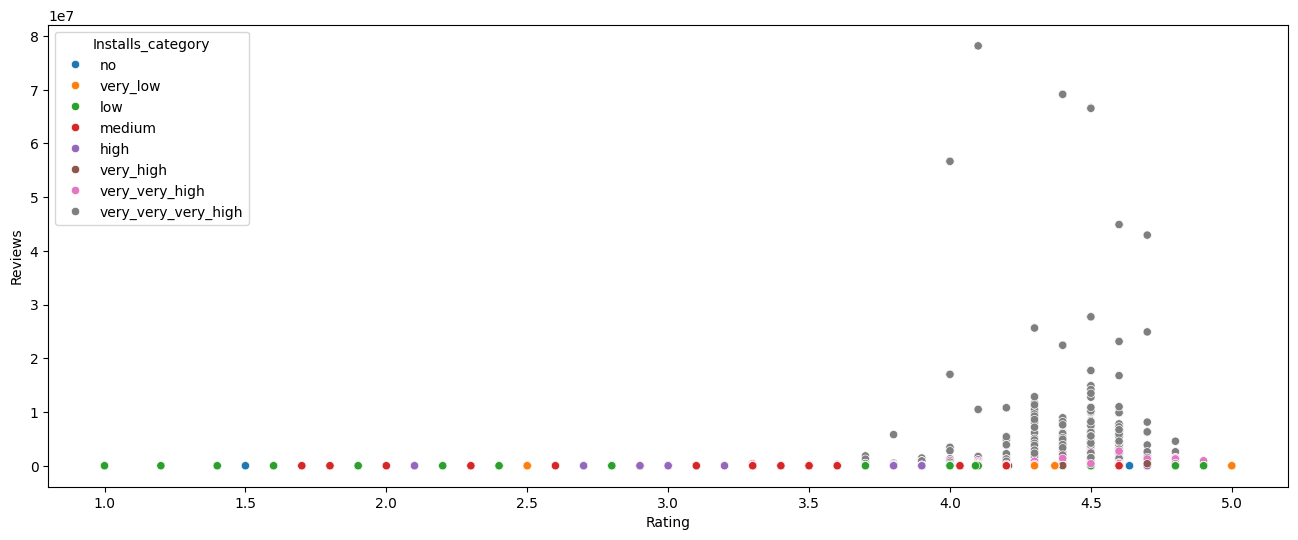

In [70]:
plt.figure(figsize=(16,6))
sns.scatterplot(x='Rating',y='Reviews',hue='Installs_category',data=df)

---
-  it doesn't show any trend , because you should now that ratiing is a categorical variabe and r eviews is a continuous variage , there fore we can not plot them toghether.
-  let's try with reviews and installs.
---

<Axes: xlabel='Reviews', ylabel='Installs'>

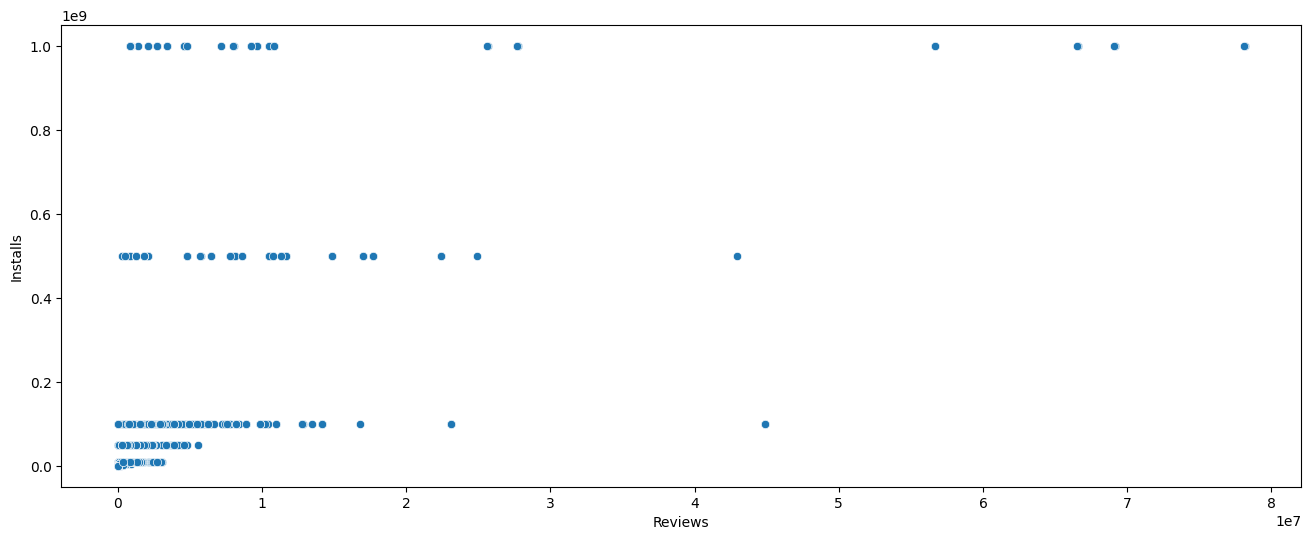

In [71]:
plt.figure(figsize=(16,6))
sns.scatterplot(x='Reviews',y='Installs',data=df)

---
##### As we see the in the graph the graph is so messy and not give the effective results and it is difficult to deduce the result out of it, on the y axis we see the number of reveiws that are 1 billion on max, so in order to make the thing in such a way to be easy understandable we apply the transformation on the data.
---

<Axes: xlabel='Reviews', ylabel='Installs'>

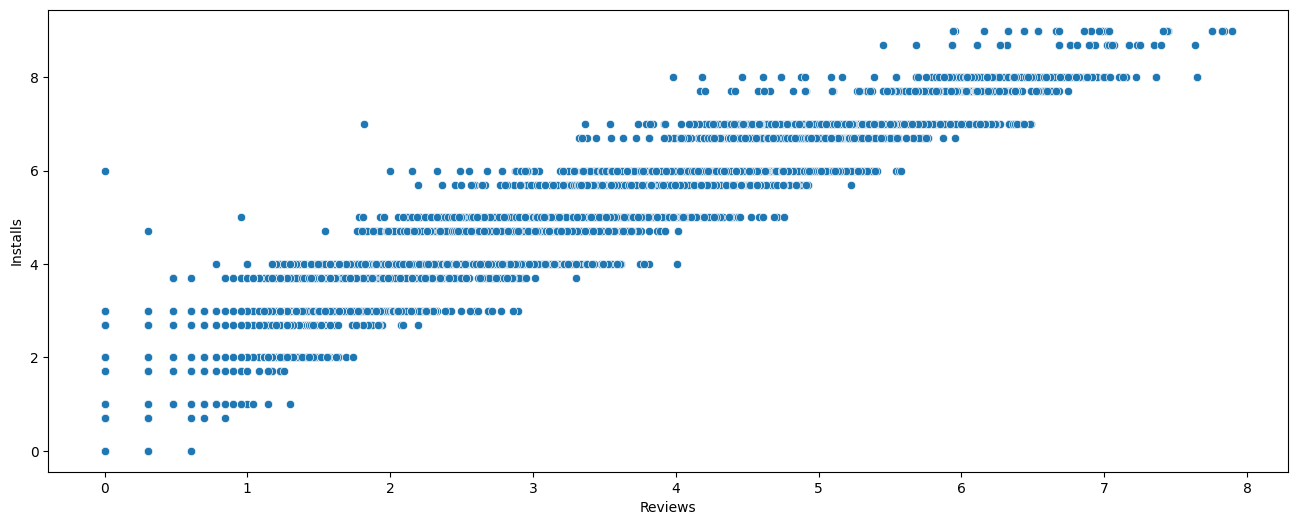

In [72]:
plt.figure(figsize=(16,6))
sns.scatterplot(x=np.log10(df['Reviews']),y=np.log10(df['Installs']),data=df)

---
#### Now we see a slight trend but the still issue in installs were give in a factorial maner as 10+ 20+ 1000+ etc and these are not continuous number but discrete one therefroe we can only see a slight trends here. let's plot a line plot to see the trends.
---

<Figure size 1600x600 with 0 Axes>

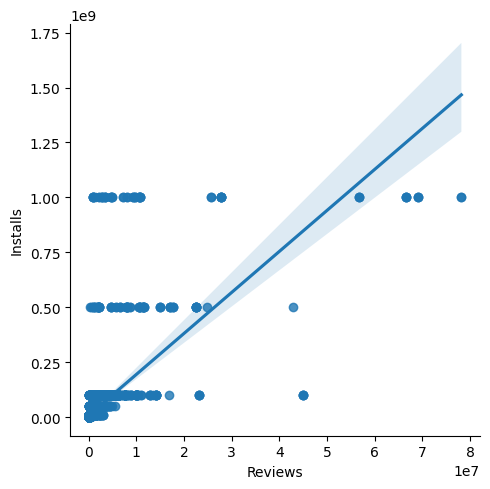

In [73]:
plt.figure(figsize=(16,6))
sns.lmplot(x='Reviews',y='Installs',data=df)

---
#### Here ,we see a nice trend which shows that number of  review increase with the number of instals which is quite obivious.

## Observation
- we can see that mst of the null values form `rating` column are no moderate intallation apps, which make senses that app has less intallation it has less rating review.\
      - but wait we have to chke for the duplication as well as they can affect our analysis. 
---

### __2.3 Duplicates__
- removing duplicates is one of the most important part of the data wrangligh processes , we must remove the duplicates in order to get the correct insinght from the data.
- if you do not remove duplicates for a dataset it can lead to incorrect insight and analysis.
- duplicates can skew statistical measures such as mean , median and stnadard deviation  nad can also lead to over represenation of certian data points.
- it is important to remove duplicates to ensure the accuracy and realiabality of yuou data analysis.

In [74]:
df.duplicated().sum()

np.int64(483)

- this shows us total duplicates but e can also check based on the app nam,e as we know that every app has a unique name.

In [75]:
df['App'].duplicated().sum()

np.int64(1181)

---
- opps we have 1181 duplicate app name.
- can we find a column which can help us to remvoe the duplicates?

#### let's check for number of duplicates in each columns using a for loop and prining the output.
---

In [76]:
for col in df.columns:
    print(f"number of duplicates in {col} column are : {df[col].duplicated().sum()}")
    

number of duplicates in App column are : 1181
number of duplicates in Category column are : 10782
number of duplicates in Rating column are : 10770
number of duplicates in Reviews column are : 4816
number of duplicates in Size_in_bytes column are : 10359
number of duplicates in Installs column are : 10796
number of duplicates in Type column are : 10813
number of duplicates in Price column are : 10727
number of duplicates in Content Rating column are : 10809
number of duplicates in Genres column are : 10696
number of duplicates in Last Updated column are : 9440
number of duplicates in Current Ver column are : 7986
number of duplicates in Android Ver column are : 10782
number of duplicates in Size_in_Mbs column are : 10359
number of duplicates in Installs_category column are : 10807


In [77]:
# find exect duplicates and print them
df[df['App'].duplicated(keep=False)].sort_values(by='App').head(5)

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mbs,Installs_category
1393,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3984588.8,500000,Free,0.00,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up,3.8,very_high
1407,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3984588.8,500000,Free,0.00,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up,3.8,very_high
2543,1800 Contacts - Lens Store,MEDICAL,4.7,23160,27262976.0,1000000,Free,0.00,Everyone,Medical,"July 27, 2018",7.4.1,5.0 and up,26.0,very_high
2322,1800 Contacts - Lens Store,MEDICAL,4.7,23160,27262976.0,1000000,Free,0.00,Everyone,Medical,"July 27, 2018",7.4.1,5.0 and up,26.0,very_high
2385,2017 EMRA Antibiotic Guide,MEDICAL,4.4,12,3984588.8,1000,Paid,16.99,Everyone,Medical,"January 27, 2017",1.0.5,4.0.3 and up,3.8,low


- remove duplicates.

In [78]:
# remove the duplicates
df.drop_duplicates(inplace=True)

In [79]:
# print the number of rows and columns after removing duiplicates
print(f"numbaer of rows and columns after removing duplicates:{df.shape}")

numbaer of rows and columns after removing duplicates:(10332, 15)


In [80]:
print(f"numbaer of rows  after removing duplicates:{df.shape[0]}")

numbaer of rows  after removing duplicates:10332


In [81]:
print(f"numbaer of columns  after removing duplicates:{df.shape[1]}")

numbaer of columns  after removing duplicates:15


---
#### after removing duplicates we are left with the 10332 rows it meas we have removed 495 rows.
---
========================================================================================================================================================

## __3. Insight from Data__
### 3.1 Which categroy has highest number of apps?

In [82]:
# which category has highest number of apps
df['Category'].value_counts()

Category
FAMILY                 1937
GAME                   1121
TOOLS                   841
BUSINESS                426
MEDICAL                 407
PRODUCTIVITY            406
PERSONALIZATION         385
LIFESTYLE               372
COMMUNICATION           366
FINANCE                 358
SPORTS                  351
PHOTOGRAPHY             322
HEALTH_AND_FITNESS      306
SOCIAL                  278
NEWS_AND_MAGAZINES      263
TRAVEL_AND_LOCAL        236
BOOKS_AND_REFERENCE     229
SHOPPING                224
DATING                  196
VIDEO_PLAYERS           175
MAPS_AND_NAVIGATION     137
EDUCATION               130
FOOD_AND_DRINK          124
ENTERTAINMENT           111
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  82
HOUSE_AND_HOME           80
EVENTS                   64
ART_AND_DESIGN           63
COMICS                   60
PARENTING                60
BEAUTY                   53
Name: count, dtype: int64

In [83]:
df['Category'].value_counts().head(10)

Category
FAMILY             1937
GAME               1121
TOOLS               841
BUSINESS            426
MEDICAL             407
PRODUCTIVITY        406
PERSONALIZATION     385
LIFESTYLE           372
COMMUNICATION       366
FINANCE             358
Name: count, dtype: int64

### 3.2 Which category has highest number of installs?

In [84]:
# categroy with the highest number of installs
df.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(10)

Category
GAME                  31544024415
COMMUNICATION         24152276251
SOCIAL                12513867902
PRODUCTIVITY          12463091369
TOOLS                 11452271905
FAMILY                10041632405
PHOTOGRAPHY            9721247655
TRAVEL_AND_LOCAL       6361887146
VIDEO_PLAYERS          6222002720
NEWS_AND_MAGAZINES     5393217760
Name: Installs, dtype: int64

### 3.3 Which categroy has highest number of reviews?

In [85]:
# category with the highest number of reviews 
df.groupby('Category')['Reviews'].sum().sort_values(ascending=False).head(10)

Category
GAME               1415536650
COMMUNICATION       601273552
SOCIAL              533576829
FAMILY              396771746
TOOLS               273181033
PHOTOGRAPHY         204297410
VIDEO_PLAYERS       110380188
PRODUCTIVITY        102554498
SHOPPING             94931162
PERSONALIZATION      75192744
Name: Reviews, dtype: int64

### 3.4 Which categroy has the highest rating?

In [86]:
# category with the highest average rating
df.groupby('Category')['Rating'].mean().sort_values(ascending=False).head(10)

Category
EVENTS                 4.412572
EDUCATION              4.373794
ART_AND_DESIGN         4.367122
BOOKS_AND_REFERENCE    4.360545
PERSONALIZATION        4.344400
HEALTH_AND_FITNESS     4.285456
GAME                   4.284402
SOCIAL                 4.264204
SPORTS                 4.263010
PARENTING              4.259759
Name: Rating, dtype: float64

<Axes: xlabel='Rating', ylabel='Density'>

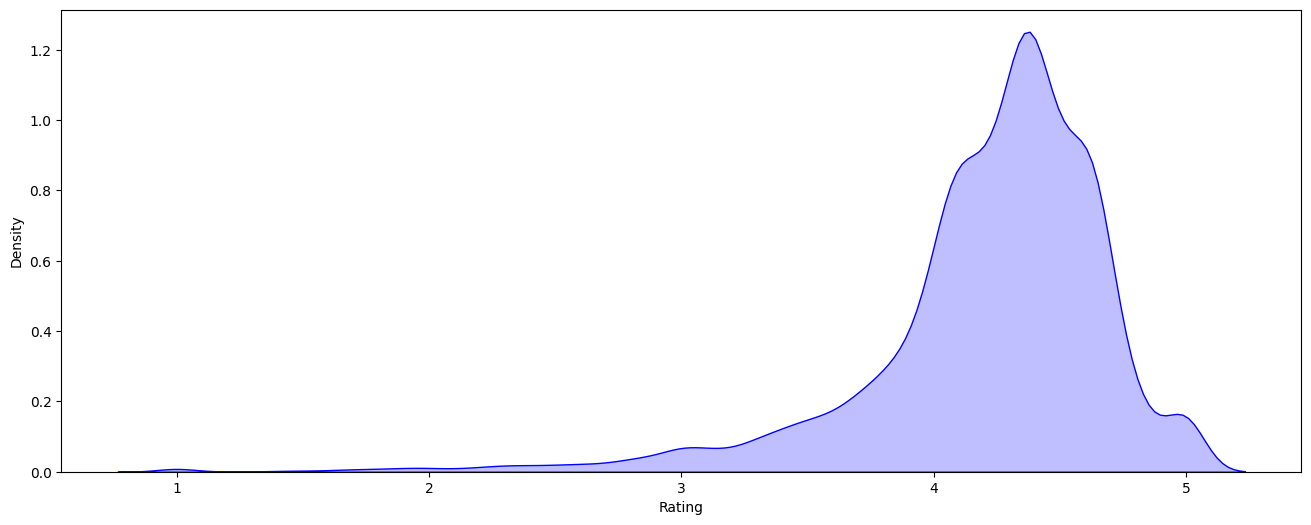

In [193]:
# here we plot the rating distribution
plt.figure(figsize=(16,6))
sns.kdeplot(df['Rating'],color='blue',shade=True)

---
## Assignment
#### Assignment at least 15 question and inspect the data find the answer and plot the graphs
---

In [87]:
df.head(5)

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mbs,Installs_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0,medium
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0,very_high
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7,very_very_high
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25.0,very_very_very_high
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.8,high


In [195]:
import nbformat 
from nbconvert import HTMLExporter

notebook = nbformat.read('complete_EDA_gogle_playstore_data.ipynb', as_version=4)

exporter = HTMLExporter()
output, resources = exporter.from_notebook_node(notebook) 

with open('google_playstore_EDA.html', 'w', encoding='utf-8') as f:
  f.write(output)